# Задание 2.1 (External resource)

In [1]:
products = {'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 199.99, 'Juice J7 (orange)': 119.99, 'Trout (Seven Seas)': 399.99}
stocks = {'Boiled sausage': '33%', 'Juice J7 (orange)': '12%', 'Trout (Seven Seas)': '18%'}
def apply_discounts(products, stocks):
    for i in products:
        if i in stocks:
            products[i] = round(products[i] - (products[i]*(int(stocks[i][:-1])/100)),2)
        else:
            pass
    return products

print(apply_discounts(products, stocks))

{'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 133.99, 'Juice J7 (orange)': 105.59, 'Trout (Seven Seas)': 327.99}


# Задание 2.2 (External resource)

In [2]:
import pandas as pd
b_top = pd.read_csv('data/bronze_top5.csv', sep=',')
s_top = pd.read_csv('data/silver_top5.csv', sep=',')
display(s_top)
display(b_top)
merged = b_top.merge(s_top, how='inner', on = 'Country', suffixes=('_bronze', '_silver'))
display(merged)

,Country,Total
0,United States,1195.0
1,Soviet Union,627.0
2,United Kingdom,591.0
3,France,461.0
4,Italy,394.0


,Country,Total
0,United States,1052.0
1,Soviet Union,584.0
2,United Kingdom,505.0
3,France,475.0
4,Germany,454.0


,Country,Total_bronze,Total_silver
0,United States,1052.0,1195.0
1,Soviet Union,584.0,627.0
2,United Kingdom,505.0,591.0
3,France,475.0,461.0


# 3. Практические задания в Jupyter Notebook

### Задание 3.1

В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями:

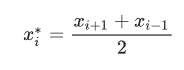

Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.

**Чему равно среднее арифметическое в столбце cum_power после заполнения пропусков? Ответ округлите до целого.**

In [130]:
solar_data = pd.read_csv('data/solarpower.csv')
for i in range(len(solar_data)):
    if solar_data['cum_power'].loc[i] == -1:
        solar_data['cum_power'].loc[i] = (solar_data['cum_power'].loc[i+1] + solar_data['cum_power'].loc[i-1])/2
display(round(solar_data['cum_power'].mean()))        

C:\Users\User\AppData\Local\Temp\ipykernel_17980\2807728951.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  solar_data['cum_power'].loc[i] = (solar_data['cum_power'].loc[i+1] + solar_data['cum_power'].loc[i-1])/2
C:\Users\User\AppData\Lo

23848

### Задание 3.2

Теперь, когда таблица заполнена, создайте столбец day_power — ежедневная выработка солнечной энергии.

Далее создайте данные о средней ежедневной выработке энергии на каждый месяц-год.

Совет: для того чтобы выделить из даты год и месяц, проще всего будет воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды (в данном случае 'М' — месяц).

Затем сгруппируйте данные по периодам (год-месяц) и рассчитайте среднее в столбце day_power.

**Сколько солнечной энергии в среднем в день выработали в марте 2017 года? Ответ округлите до целого.**

In [131]:
solar_data['date'] = pd.to_datetime(solar_data['date']).dt.to_period('M')

In [135]:
solar_data['day_power'] = solar_data['cum_power'].diff()
print(solar_data['day_power'])

mask1 = solar_data.pivot_table(
    values='day_power',
    index='date',
    aggfunc='mean',
    fill_value=0
)
display(mask1)

0      NaN
1      1.0
2      3.0
3      2.0
4      2.0
      ... 
659    6.0
660    8.0
661    6.0
662    2.0
663    3.0
Name: day_power, Length: 664, dtype: float64


,day_power
date,
2017-01,3.233333
2017-02,3.714286
2017-03,10.774194
2017-04,16.300000
2017-05,19.000000
2017-06,21.500000
2017-07,18.129032
2017-08,15.064516
2017-09,11.533333


# Задание 3.3

Постройте график временного ряда — средней ежедневной выработки солнечной энергии на каждый месяц-год. Не забудьте подписать оси и сам график.

Выберите вывод, который можно сделать из полученного графика:

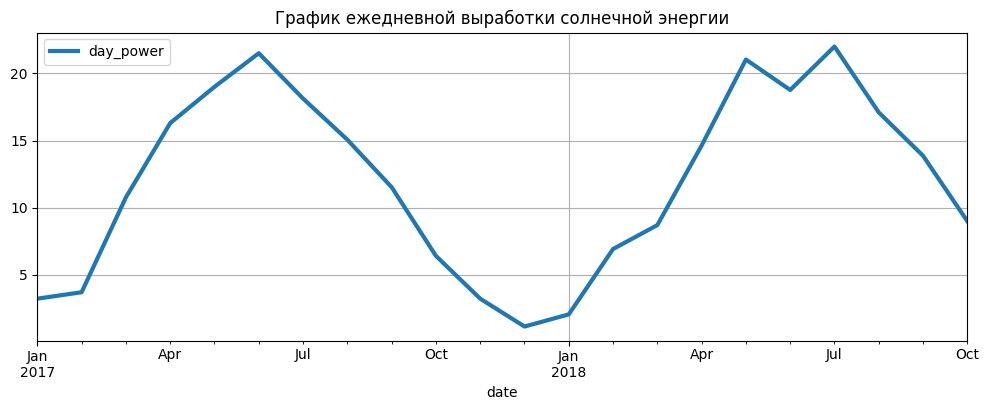

In [137]:
mask1.plot(
    kind='line',
    figsize=(12, 4),
    title='График ежедневной выработки солнечной энергии',
    grid = True,
    lw=3
);